# Spam classfication 

## Importing libraries

In [1]:
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import re
import time
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
%matplotlib inline 

## Dataset Location

In [2]:
dataset = '../data/spam - spam.csv'

## Convert to dataframe

In [3]:
df = pd.read_csv(dataset)
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Replacing Column names

In [4]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df = df.rename(columns={'v1': 'target', 'v2': 'message'})
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Duplicate removal

In [5]:
print(f'Number of duplicated rows are', df.duplicated().sum())
print(f'The shape of the dataset is', df.shape)
df[df.duplicated()]


Number of duplicated rows are 409
The shape of the dataset is (5572, 2)


,target,message
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [6]:
df.drop_duplicates(inplace=True)
print(f'The shape of the dataset after removing duplicate is ', df.shape)

The shape of the dataset after removing duplicate is  (5163, 2)


## DATA VISUALIZATION
- Pie chart for spam and ham
- Bar chart for spam and ham
- Word cloud for spam and ham

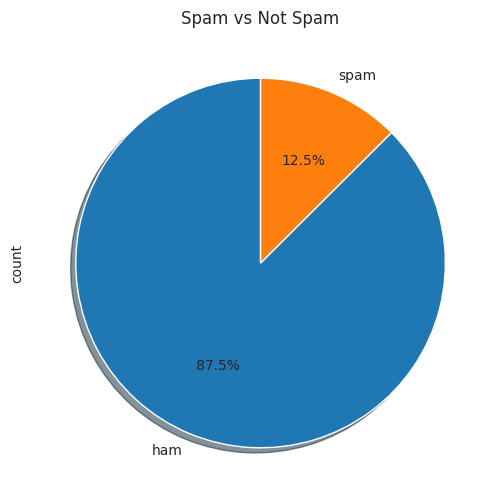

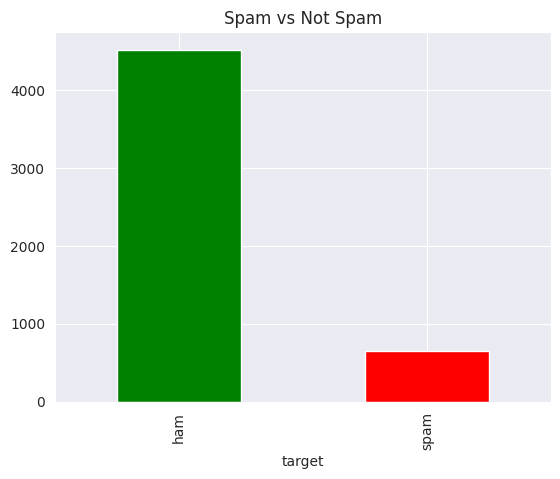

In [7]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
df['target'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Spam vs Not Spam')
plt.show()

df['target'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Spam vs Not Spam')
plt.show()

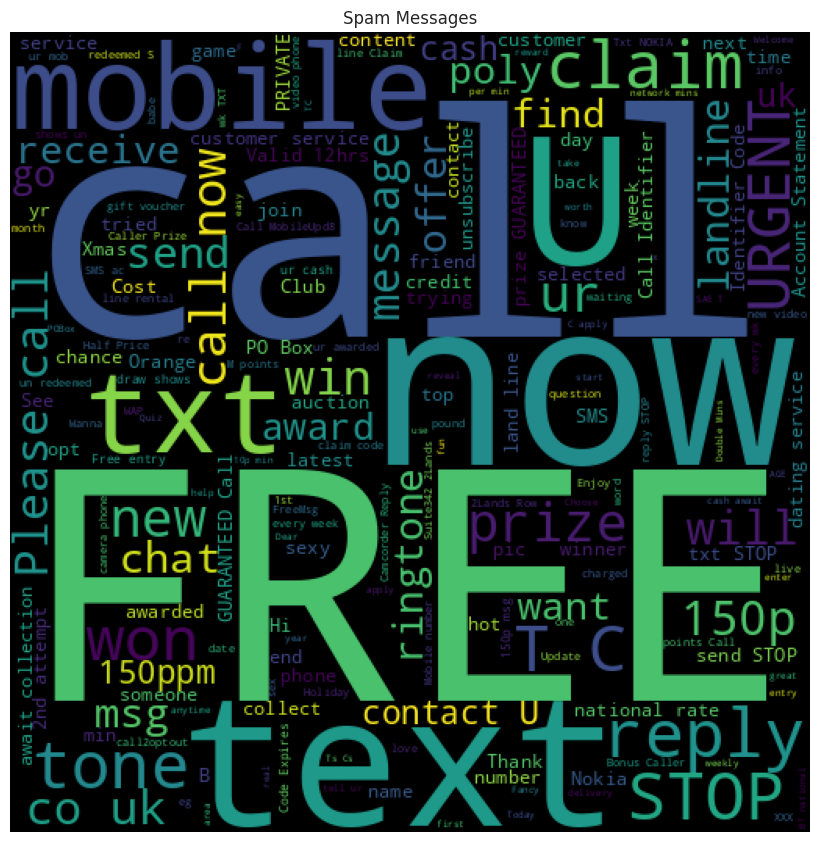

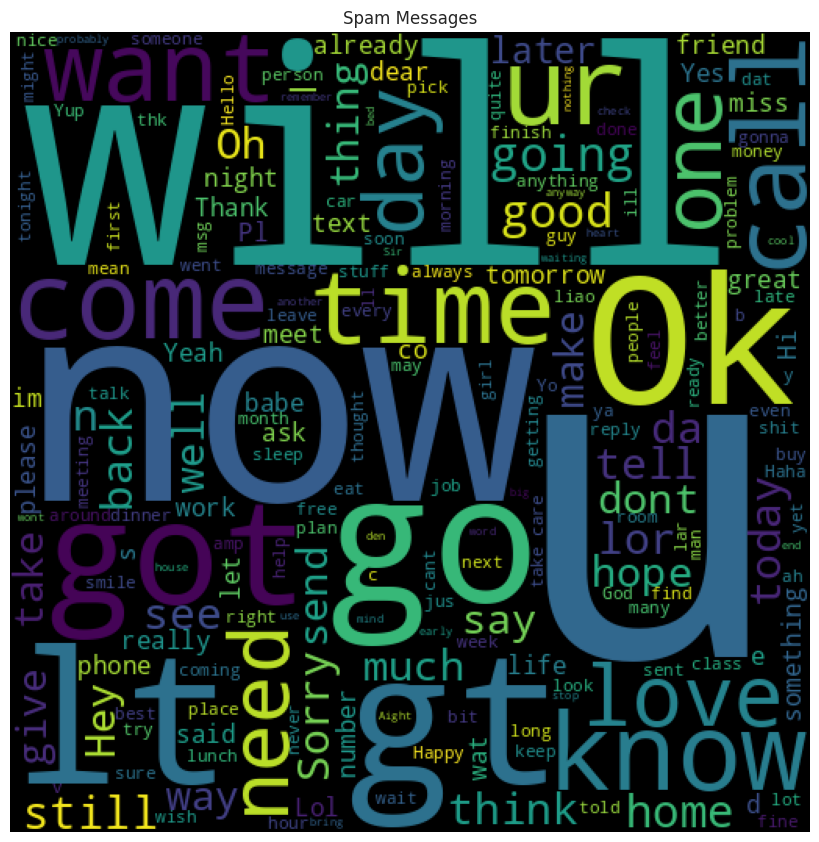

In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

#target contains the 0 and 1 values

spam_words = ' '.join(list(df[df['target']=='spam']['message']))
spam_wc = WordCloud(width=512, height=512).generate(spam_words)
plt.figure(figsize=(10, 8), facecolor='w')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Spam Messages')
plt.show()

ham_words = ' '.join(list(df[df['target']=='ham']['message']))
ham_wc = WordCloud(width=512, height=512).generate(ham_words)
plt.figure(figsize=(10, 8), facecolor='w')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Spam Messages')
plt.show()


## Tokenization
- Sentence tokenization
- Word tokenization
- Character tokenization

In [9]:
df['lines'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df['words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
df['characters'] = df['message'].apply(lambda x: len(x))
df.head()

,target,message,lines,words,characters
0,ham,"Go until jurong point, crazy.. Available only ...",2,24,111
1,ham,Ok lar... Joking wif u oni...,2,8,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,2,37,155
3,ham,U dun say so early hor... U c already then say...,1,13,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",1,15,61


## Describe

In [10]:
df.describe()

,lines,words,characters
count,5163.000000,5163.000000,5163.000000
mean,1.963974,18.444122,78.811156
std,1.448008,13.327940,58.153491
min,1.000000,1.000000,2.000000
25%,1.000000,9.000000,36.000000
50%,1.000000,15.000000,60.000000
75%,2.000000,26.000000,116.000000
max,38.000000,220.000000,910.000000


In [11]:
print(f'Description of the Spam messages')
df[df['target'] == 'spam'].describe()

Description of the Spam messages


,lines,words,characters
count,647.000000,647.000000,647.000000
mean,2.967543,27.659969,137.318393
std,1.490069,7.038065,30.096861
min,1.000000,2.000000,13.000000
25%,2.000000,25.000000,130.000000
50%,3.000000,29.000000,148.000000
75%,4.000000,32.000000,157.000000
max,9.000000,46.000000,223.000000


In [12]:
print(f'Description of the Ham messages')
df[df['target'] == 'ham'].describe()

Description of the Ham messages


,lines,words,characters
count,4516.000000,4516.000000,4516.000000
mean,1.820195,17.123782,70.428919
std,1.383657,13.493970,56.356310
min,1.000000,1.000000,2.000000
25%,1.000000,8.000000,34.000000
50%,1.000000,13.000000,52.000000
75%,2.000000,22.000000,90.000000
max,38.000000,220.000000,910.000000
